# Workshop 4 : Model Training and Evaluation

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Workshop-4-:-Model-Training-and-Evaluation" data-toc-modified-id="Workshop-4-:-Model-Training-and-Evaluation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Workshop 4 : Model Training and Evaluation</a></span><ul class="toc-item"><li><span><a href="#Classification" data-toc-modified-id="Classification-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Classification</a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Regression</a></span></li><li><span><a href="#Clustering-and-Anomaly-Detection" data-toc-modified-id="Clustering-and-Anomaly-Detection-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Clustering and Anomaly Detection</a></span></li><li><span><a href="#Time-Series" data-toc-modified-id="Time-Series-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Time Series</a></span></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Model Selection</a></span><ul class="toc-item"><li><span><a href="#AutoML" data-toc-modified-id="AutoML-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>AutoML</a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Cross-Validation</a></span></li></ul></li></ul></li></ul></div>

<div class="alert alert-block alert-warning">
Before going through model training you need to conduct data preparation, and feature engineering to increase the chances to get good performance.
</div>

In [1]:
import verticapy as vp
# Connect with the database
vp.connect("tutorial_connection")
# Create VerticaPy schema for native verticapy models
vp.create_verticapy_schema()

In general, conduction manual data preparation and features engineering lead to better results.
In this section, we will not focus on data preparation because it's out of our scope (please refer to the previous workshops)

In [2]:
from verticapy.learn.linear_model import LogisticRegression
import verticapy as vp
import matplotlib.pyplot as plt
churn = vp.vDataFrame("public.churn")

Several variables are categorical, and since they all have low cardinalities, we can compute their dummies. We can also convert all booleans to numeric.

SeniorCitizen    Partner    Dependents    tenure    PhoneService    MultipleLines    OnlineSecurity    OnlineBackup    DeviceProtection    TechSupport   \\
1                  0          1             1         9               1                0                 0               1                   0              1   \\
2                  0          0             0         9               1                1                 0               0                   0              0   \\
3                  0          0             0         4               1                0                 0               0                   1              0   \\
4                  1          1             0        13               1                0                 0               1                   1              0   \\
5                  1          1             0         3               1                0                 0               0                   0              1   \\
6                  0          0             1         9               1                0                 0               0                   0              1   \\
7                  1          1             0        71               1                0                 1               1                   1              1   \\
8                  0          1             0        63               1                1                 1               0                   0              1   \\
9                  1          0             0         7               1                0                 1               0                   0              0   \\
10                 0          1             1        65               1                1                 1               1                   1              1   \\
11                 0          0             0        54               0                0                 1               0                   0              1   \\
12                 0          1             1        72               1                1                 1               1                   1              1   \\
13                 0          1             0         5               1                0                 0               0                   0              0   \\
14                 0          0             0        72               1                1                 1               1                   1              0   \\
15                 0          0             0        56               0                0                 1               1                   1              1   \\
16                 0          1             1        71               1                1                 0               1                   1              0   \\
17                 0          1             1        34               0                0                 1               0                   1              1   \\
18                 1          0             0         1               1                1                 0               0                   0              0   \\
19                 1          0             0        45               1                0                 1               0                   1              0   \\
20                 1          0             0         1               0                0                 0               0                   0              0   \\
21                 1          1             0        50               1                1                 0               0                   0              0   \\
22                 0          1             0        13               1                1                 0               1                   1              0   \\
23                 0          1             1        23               1                1                 0               0                   0              0   \\
24                 0          0             0         3               1                0       
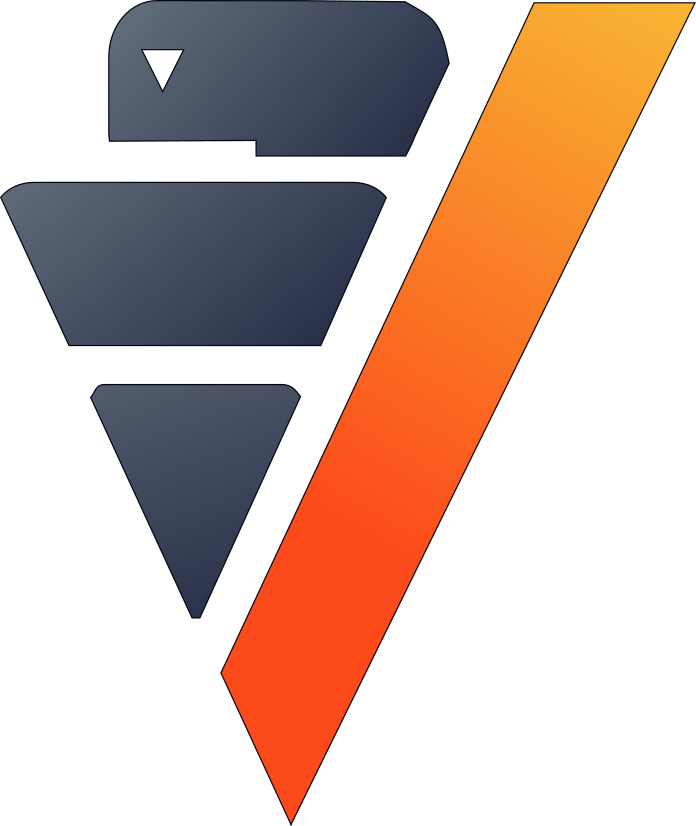

In [3]:
for column in ["DeviceProtection",
               "MultipleLines",
               "PaperlessBilling",
               "Churn",
               "TechSupport",
               "Partner",
               "StreamingTV",
               "OnlineBackup",
               "Dependents",
               "OnlineSecurity",
               "PhoneService",
               "StreamingMovies"]:
    churn[column].decode("Yes", 1, 0)
churn.one_hot_encode().drop(["customerID",
                             "gender",
                             "Contract",
                             "PaymentMethod",
                             "InternetService"])

In [4]:
# Split data to train and test data
train, test = churn.train_test_split(test_size=0.2,
                                     random_state=0)

## Classification 

For more models, please check [here](https://www.vertica.com/python/documentation_last/learn/classification.php)

value  
auc                0.8475375608527791  
prc_auc            0.6397043096511206  
accuracy           0.8091168091168092  
log_loss            0.177979647352899  
precision                     0.65625  
recall             0.5706521739130435  
f1_score           0.6104651162790697  
mcc               0.48694072273165434  
informedness       0.4644745677354374  
markedness         0.5104935424354244  
csi                0.4393305439330544  
cutoff                            0.5  
Rows: 1-12 | Columns: 2
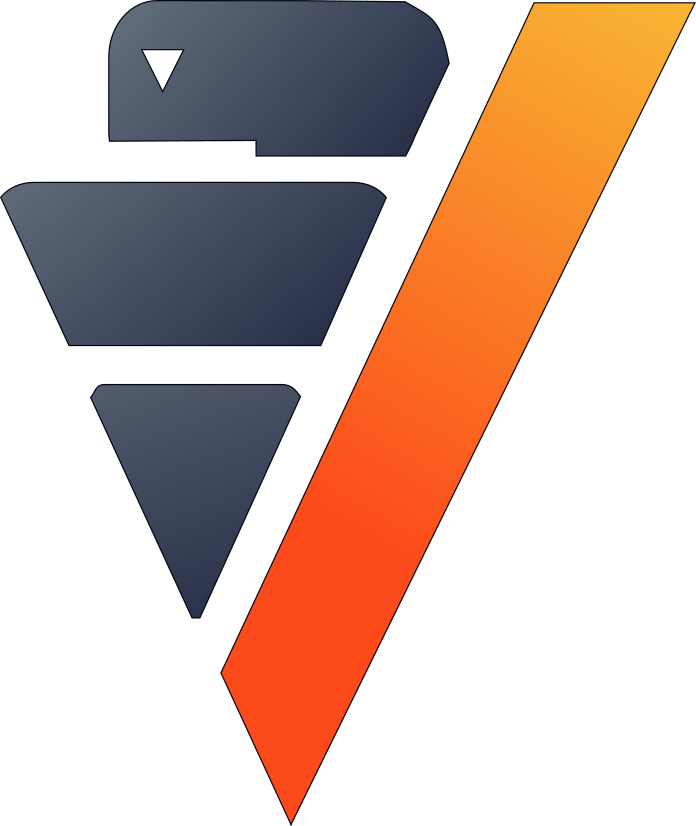

In [5]:
lr_model = LogisticRegression("churn_model",
                              penalty='L2',
                              tol=1e-6,
                              max_iter=1000,
                              solver="BFGS")
lr_model.fit(train,
             churn.get_columns(exclude_columns=["churn"]),
             'churn',
             test)
lr_model.classification_report()

importance    sign  
tenure                                         29.68      -1  
totalcharges                                   19.21       1  
contract_month-to-month                         8.39       1  
monthlycharges                                  7.49       1  
internetservice_fiber_optic                     5.66       1  
phoneservice                                    4.95      -1  
contract_one_year                                4.0       1  
onlinesecurity                                  3.36      -1  
internetservice_dsl                             2.93       1  
paymentmethod_electronic_check                  2.24       1  
techsupport                                     2.17      -1  
paperlessbilling                                2.05       1  
seniorcitizen                                   1.35       1  
onlinebackup                                    1.18      -1  
streamingmovies                                 0.99       1  
multiplelines                                   0.96       1  
streamingtv                                     0.77       1  
deviceprotection                                0.76      -1  
dependents                                      0.65      -1  
paymentmethod_bank_transfer_(automatic)         0.52       1  
gender_female                                   0.39       1  
paymentmethod_credit_card_(automatic)            0.2      -1  
partner                                          0.1       1  
Rows: 1-23 | Columns: 3
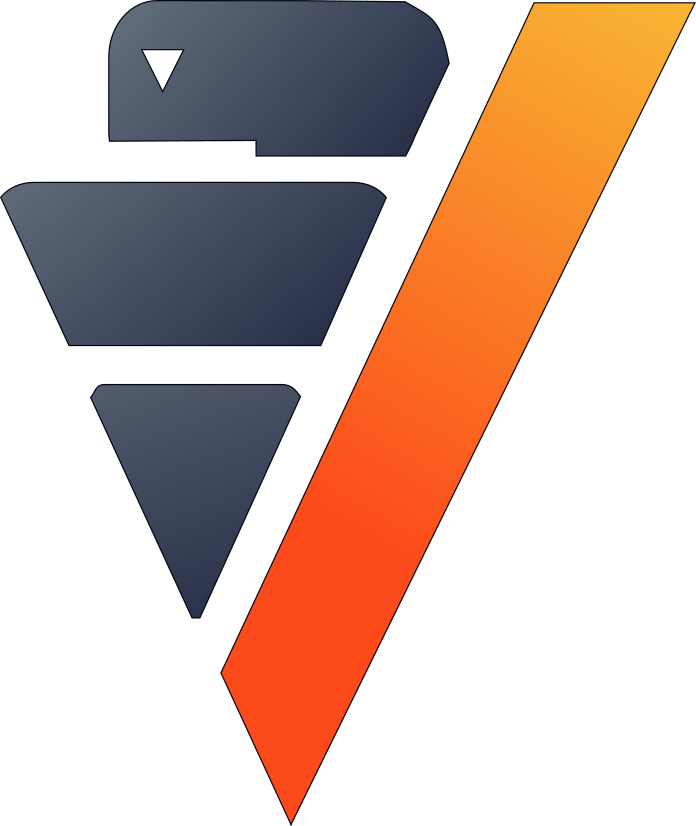

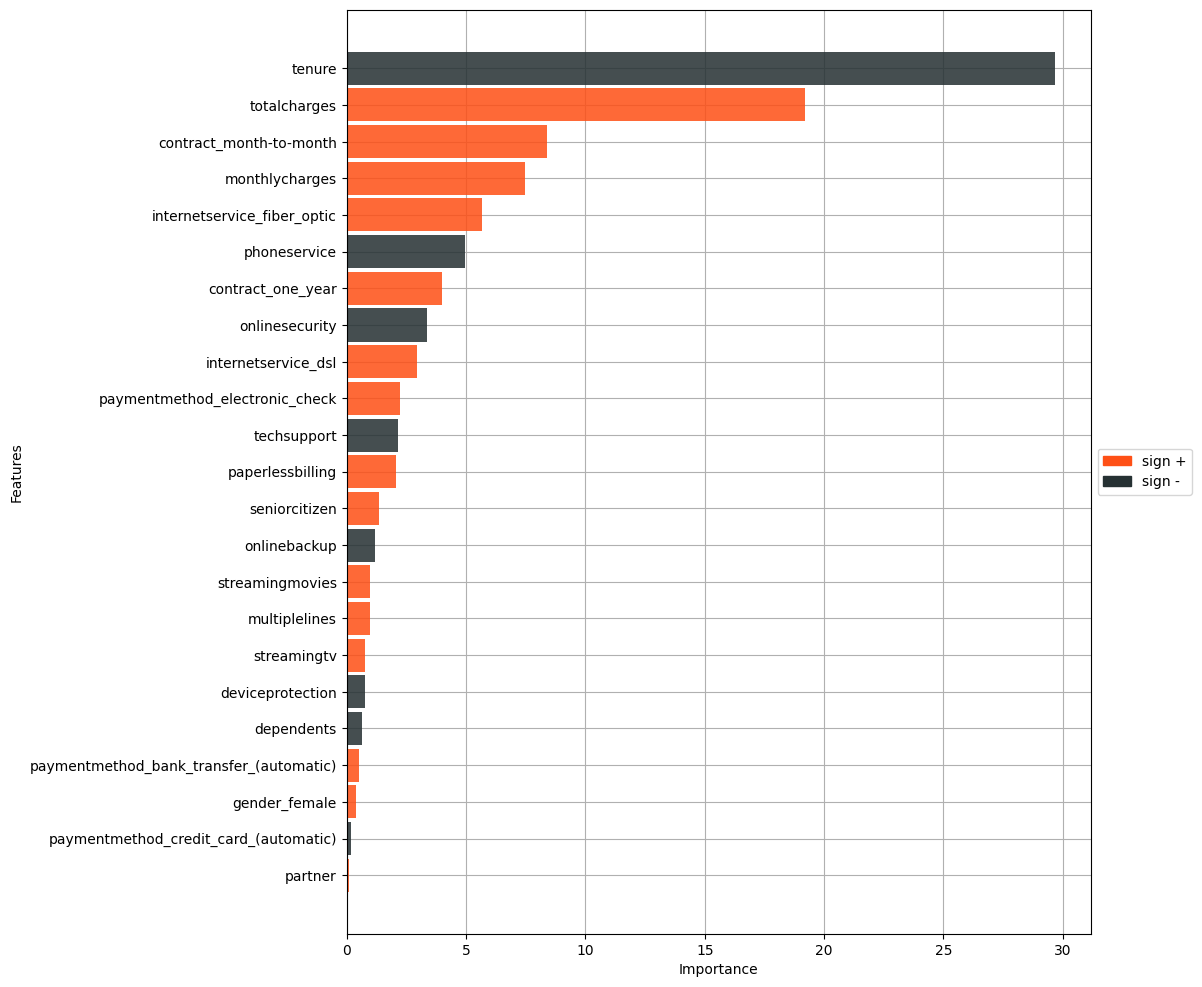

In [6]:
lr_model.features_importance()

## Regression

For more models, please check [here](https://www.vertica.com/python/documentation_last/learn/regression.php)

In [7]:
from verticapy.learn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(name="public.rf_churn",
                                 n_estimators=20,
                                 max_features="auto",
                                 max_leaf_nodes=32,
                                 sample=0.7,
                                 max_depth=3,
                                 min_samples_leaf=5,
                                 min_info_gain=0.0,
                                 nbins=32)
rf_model.fit(train,
             churn.get_columns(exclude_columns=["totalcharges"]),
             'totalcharges',
             test)



call_string
SELECT rf_regressor('public.rf_churn', '"public"."_verticapy_tmp_view_dbadmin_18548_8565318746_"', 'totalcharges', '"SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "MonthlyCharges", "Churn", "gender_Female", "InternetService_DSL", "InternetService_Fiber_optic", "Contract_Month-to-month", "Contract_One_year", "PaymentMethod_Bank_transfer_(automatic)", "PaymentMethod_Credit_card_(automatic)", "PaymentMethod_Electronic_check"' USING PARAMETERS exclude_columns='', ntree=20, mtry=8, sampling_size=0.7, max_depth=3, max_breadth=32, min_leaf_size=5, min_info_gain=0, nbins=32);

details
               predictor               |      type      
---------------------------------------+----------------
             seniorcitizen             |      int       
                partner                |      int       
             

value  
explained_variance            0.905990594566903  
max_error                      2247.17054793486  
median_absolute_error          443.678707397014  
mean_absolute_error            558.779642162504  
mean_squared_error              486304.00067707  
root_mean_squared_error       697.3550033355106  
r2                             0.90599003806551  
r2_adj                       0.9044277337848068  
aic                          18486.049305119643  
bic                           18611.17983904209  
Rows: 1-10 | Columns: 2
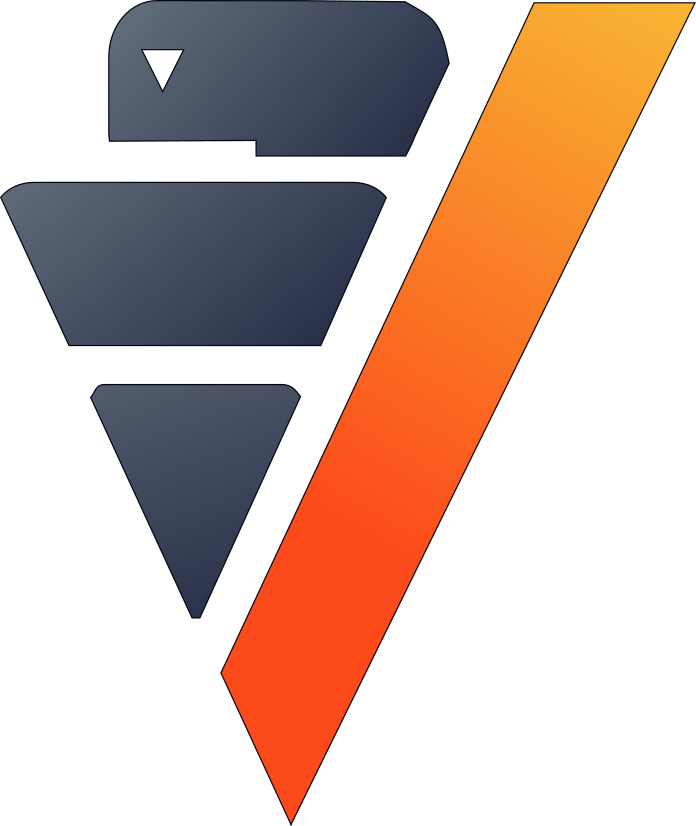

In [8]:
rf_model.report()

## Clustering and Anomaly Detection 

For more models, please check [here](https://www.vertica.com/python/documentation_last/learn/unsupervised.php)

In [9]:
from verticapy.learn.cluster import KMeans
kmeans_model = KMeans(name="public.kmeans_iris",
                      n_cluster=8,
                      init="kmeanspp",
                      max_iter=300,
                      tol=1e-4)
kmeans_model.fit(churn,
                 churn.get_columns(exclude_columns=["churn"]))



centers
seniorcitizen|partner |dependents| tenure |phoneservice|multiplelines|onlinesecurity|onlinebackup|deviceprotection|techsupport|streamingtv|streamingmovies|paperlessbilling|monthlycharges|totalcharges|gender_female|internetservice_dsl|internetservice_fiber_optic|contract_month-to-month|contract_one_year|paymentmethod_bank_transfer_(automatic)|paymentmethod_credit_card_(automatic)|paymentmethod_electronic_check
-------------+--------+----------+--------+------------+-------------+--------------+------------+----------------+-----------+-----------+---------------+----------------+--------------+------------+-------------+-------------------+---------------------------+-----------------------+-----------------+---------------------------------------+-------------------------------------+------------------------------
   0.12167   | 0.27575|  0.23890 | 6.61012|   0.88899  |   0.17007   |    0.09858   |   0.12345  |     0.10346    |  0.10124  |  0.15187  |    0.15053    |     0.52

In [10]:
# prediction
churn_clustered = kmeans_model.predict(churn,
                                       X=churn.get_columns(
                                           exclude_columns=["churn"]),
                                       name="cluster")

SeniorCitizen    Partner    Dependents    tenure    PhoneService    MultipleLines    OnlineSecurity    OnlineBackup    DeviceProtection    TechSupport   \\
1                  0          1             1         9               1                0                 0               1                   0              1   \\
2                  0          0             0         9               1                1                 0               0                   0              0   \\
3                  0          0             0         4               1                0                 0               0                   1              0   \\
4                  1          1             0        13               1                0                 0               1                   1              0   \\
5                  1          1             0         3               1                0                 0               0                   0              1   \\
6                  0          0             1         9               1                0                 0               0                   0              1   \\
7                  1          1             0        71               1                0                 1               1                   1              1   \\
8                  0          1             0        63               1                1                 1               0                   0              1   \\
9                  1          0             0         7               1                0                 1               0                   0              0   \\
10                 0          1             1        65               1                1                 1               1                   1              1   \\
11                 0          0             0        54               0                0                 1               0                   0              1   \\
12                 0          1             1        72               1                1                 1               1                   1              1   \\
13                 0          1             0         5               1                0                 0               0                   0              0   \\
14                 0          0             0        72               1                1                 1               1                   1              0   \\
15                 0          0             0        56               0                0                 1               1                   1              1   \\
16                 0          1             1        71               1                1                 0               1                   1              0   \\
17                 0          1             1        34               0                0                 1               0                   1              1   \\
18                 1          0             0         1               1                1                 0               0                   0              0   \\
19                 1          0             0        45               1                0                 1               0                   1              0   \\
20                 1          0             0         1               0                0                 0               0                   0              0   \\
21                 1          1             0        50               1                1                 0               0                   0              0   \\
22                 0          1             0        13               1                1                 0               1                   1              0   \\
23                 0          1             1        23               1                1                 0               0                   0              0   \\
24                 0          0             0         3               1                0       
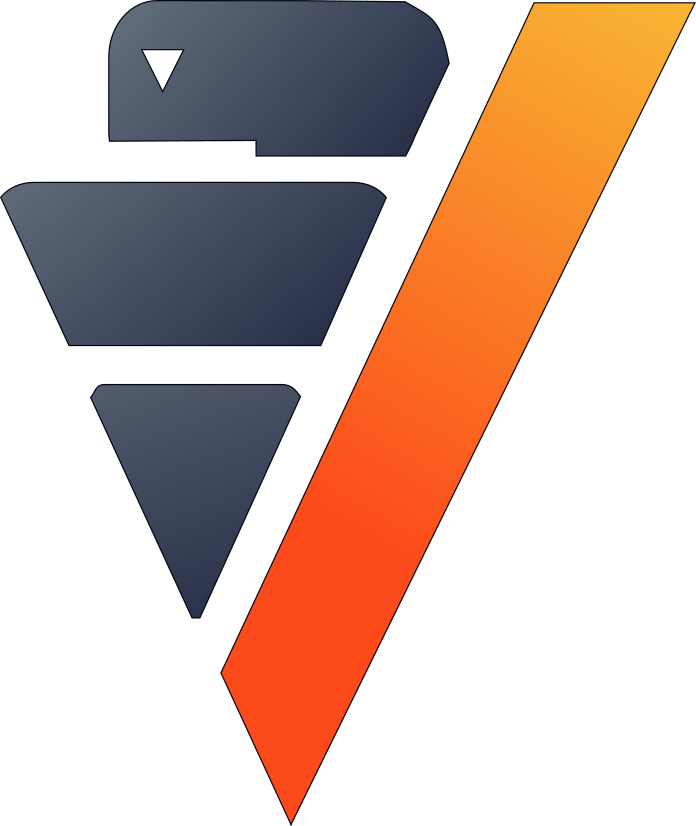

In [11]:
churn_clustered

For Isolation forest you can use `decision_function` to return the anomaly score (range from 0 to 1), then it gave you the flexibility to choose the threshold manually.

SeniorCitizen    Partner    Dependents    tenure    PhoneService    MultipleLines    OnlineSecurity    OnlineBackup    DeviceProtection    TechSupport   \\
1                  0          1             1         9               1                0                 0               1                   0              1   \\
2                  0          0             0         9               1                1                 0               0                   0              0   \\
3                  0          0             0         4               1                0                 0               0                   1              0   \\
4                  1          1             0        13               1                0                 0               1                   1              0   \\
5                  1          1             0         3               1                0                 0               0                   0              1   \\
6                  0          0             1         9               1                0                 0               0                   0              1   \\
7                  1          1             0        71               1                0                 1               1                   1              1   \\
8                  0          1             0        63               1                1                 1               0                   0              1   \\
9                  1          0             0         7               1                0                 1               0                   0              0   \\
10                 0          1             1        65               1                1                 1               1                   1              1   \\
11                 0          0             0        54               0                0                 1               0                   0              1   \\
12                 0          1             1        72               1                1                 1               1                   1              1   \\
13                 0          1             0         5               1                0                 0               0                   0              0   \\
14                 0          0             0        72               1                1                 1               1                   1              0   \\
15                 0          0             0        56               0                0                 1               1                   1              1   \\
16                 0          1             1        71               1                1                 0               1                   1              0   \\
17                 0          1             1        34               0                0                 1               0                   1              1   \\
18                 1          0             0         1               1                1                 0               0                   0              0   \\
19                 1          0             0        45               1                0                 1               0                   1              0   \\
20                 1          0             0         1               0                0                 0               0                   0              0   \\
21                 1          1             0        50               1                1                 0               0                   0              0   \\
22                 0          1             0        13               1                1                 0               1                   1              0   \\
23                 0          1             1        23               1                1                 0               0                   0              0   \\
24                 0          0             0         3               1                0       
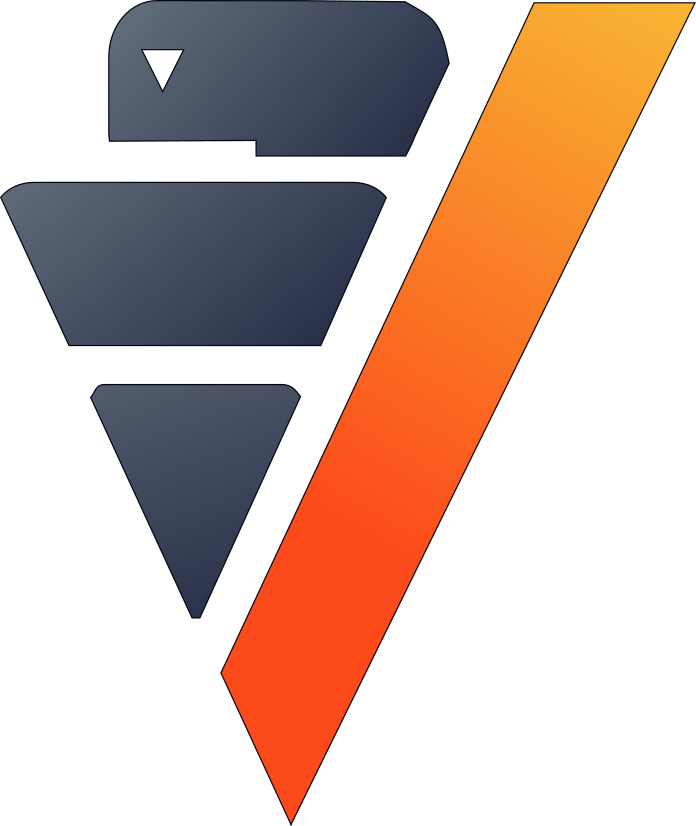

In [12]:
from verticapy.learn.ensemble import IsolationForest

# Initialization of isolation forest
iforest_model = IsolationForest(name="public.iforest_model",
                                n_estimators=20,
                                max_depth=3,
                                nbins=32)
# fit the model
iforest_model.fit(churn,
                  churn.get_columns(exclude_columns=["cluster"]))

# prediction
iforest_model.decision_function(churn,
                                churn.get_columns(exclude_columns=["cluster"]),
                                name="anomaly_score")

## Time Series
Time series models are a type of regression on a dataset with a timestamp label.

date                Gold                 Oil                 Spread                 Vix              Dol_Eur         SP500  
1      1986-01-01    345.561363636364    22.9254545454545       1.05142857142857    18.1213636363636     1.12159999999858    211.779999  
2      1986-02-01            339.0525    15.4547368421053      0.736842105263158    20.6242105263158     1.07880000000296    226.919998  
3      1986-03-01    346.094736842105             12.6125                  0.564              23.564     1.04850000000442    238.899994  
4      1986-04-01    340.715909090909    12.8436363636364      0.604090909090909    23.0154545454545     1.05259999999544    235.520004  
5      1986-05-01             342.325     15.377619047619      0.642380952380952             18.8875     1.03720000000612    247.350006  
6      1986-06-01    342.797619047619    13.4257142857143      0.614761904761905    18.5980952380952      1.0399999999936    250.839996  
7      1986-07-01    348.554347826087    11.5845454545455      0.636818181818182    19.6390909090909     1.01029999999446    236.119995  
8      1986-08-01              376.29    15.0966666666667       0.83952380952381    18.6380952380952    0.979300000000876    252.929993  
9      1986-09-01    418.152272727273    14.8666666666667       1.10142857142857    22.7052380952381    0.973200000000361    231.320007  
10     1986-10-01    423.863043478261    14.8968181818182       1.14727272727273    22.5239130434783    0.961600000000544    243.979996  
11     1986-11-01            396.9825    15.2215789473684      0.973888888888889    18.6315789473684    0.967399999999543    249.220001  
12     1986-12-01    391.595238095238     16.107619047619      0.840909090909091    19.7586363636364    0.957399999999325    242.169998  
13     1987-01-01     408.52380952381    18.6514285714286                 0.8585    20.7666666666667    0.900400000000445    274.079987  
14     1987-02-01             401.045    17.7489473684211      0.852631578947368    23.4463157894737    0.882600000000821    284.200012  
15     1987-03-01    408.847727272727    18.3028571428571      0.824090909090909    21.8372727272727    0.883599999999206    291.700012  
16     1987-04-01             439.665    18.6771428571429      0.998571428571429    26.8814285714286    0.872100000000501    288.359985  
17     1987-05-01              461.65             19.4375                 0.8515             25.4115    0.861100000000079    290.100006  
18     1987-06-01    449.277272727273    20.0731818181818      0.829090909090909    21.6245454545455    0.876500000000306         304.0  
19     1987-07-01    450.330434782609    21.3421739130435       1.00454545454545    17.8009090909091    0.888600000000224    318.660004  
20     1987-08-01            460.9875    20.3109523809524       1.00761904761905    20.8490476190476     0.89600000000064    329.799988  
21     1987-09-01    460.120454545455               19.53       1.07809523809524    22.8938095238095    0.873499999999694    321.829987  
22     1987-10-01    465.763636363636    19.8590909090909       1.12238095238095    58.2195454545455    0.868599999999788    251.789993  
23     1987-11-01    468.140476190476              18.854       1.16789473684211             49.4365    0.814700000000812    230.300003  
24     1987-12-01    487.078571428571    17.2745454545455                   1.13    41.7640909090909    0.791400000000067    247.080002  
25     1988-01-01            477.7575             17.1295       1.03578947368421             38.3365    0.800100000000384    257.070007  
26     1988-02-01     442.12380952381    16.7957142857143                 1.0315              33.674    0.822000000000116    267.820007  
27     1988-03-01    443.491304347826    16.1973913043478       1.10304347826087    29.3569565217391    0.810900000000402    258.890015  
28     1988-04-01    451.557894736842             17.8625                  1.129              27.405    0.805700000000798    261.329987  
29     1988
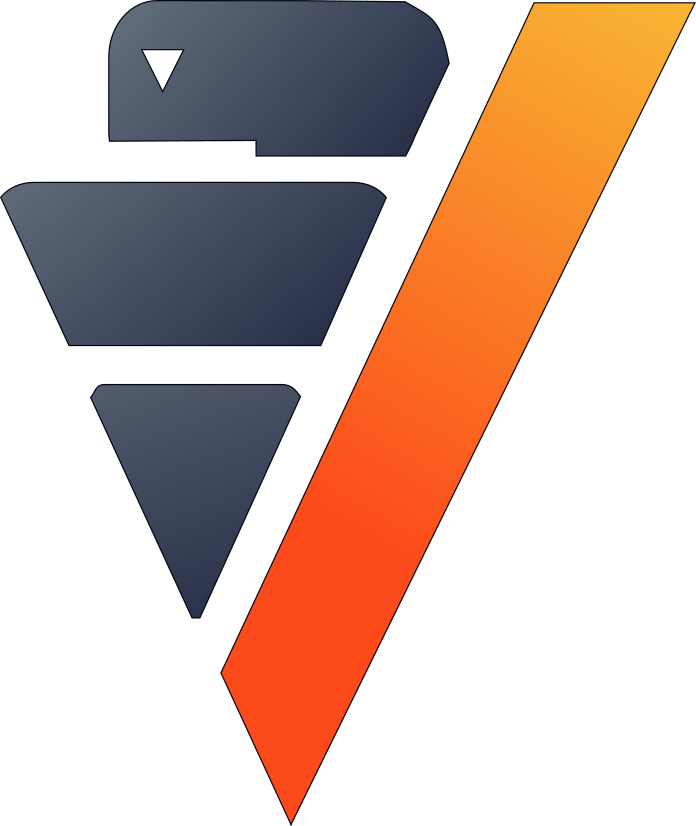

In [13]:
from verticapy.datasets import load_commodities
commodities = load_commodities()
display(commodities)

Let's create a [`VAR`](https://www.vertica.com/python/documentation_last/learn/VAR/) model to predict the change in our variables over time.

<div class="alert alert-block alert-warning">
    VAR and <a href="https://www.vertica.com/python/documentation_last/learn/SARIMAX/index.php" title="read_csv">SARIMAX</a> models implementation uses pure SQL, so it is advisable not to use it on a huge dataset.
</div>

In [14]:
from verticapy.learn.tsa import VAR
var_model = VAR("VAR_commodities", p=15)
var_model.drop()
var_model.fit(input_relation="commodities",
              X=["Gold", "Oil", "Spread", "Vix", "Dol_Eur", "SP500"],
              ts="date")

details

 # "Gold"

      predictor            coefficient               std_err                t_value                 p_value  
1     Intercept       28.5362468915191      23.4576167158535       1.21650239396372       0.224719007474869  
2         ar0_1       1.21249546311209    0.0583003268515877       20.7974042100773    9.38585656197178e-61  
3         ar0_2     -0.265717276383384    0.0911043814875882      -2.91662455794823     0.00379668763754037  
4         ar0_3      0.123604924076076    0.0924434825014417       1.33708640924631        0.18217474351721  
5         ar0_4    -0.0846535235905854    0.0922931959314058     -0.917223883475676        0.35973835612789  
6         ar0_5      0.147588310874085    0.0934758772779836       1.57889195770988        0.11538065396013  
7         ar0_6    -0.0746737711527223    0.0964409915451842     -0.774294933682183       0.439346523264487  
8         ar0_7     0.0300398502170651    0.0949450469490103      0.316391967589398       0.75191794

"Gold"                 "Oil"              "Spread"                 "Vix"             "Dol_Eur"               "SP500"  
explained_variance            -2.99075369649758     -2.95351617131735     -2.95000151118535     -2.42784247622005     -2.92957533669835     -2.98564084457666  
max_error                      3840.31462070037      266.088676452611      5.84729874087839      131.091119943061      2.27388220306767      6746.24885913539  
median_absolute_error          802.159981554754      67.6175692024529      2.21128777148926      39.4665387048983      1.59450253575079      2173.50932929945  
mean_absolute_error            1409.89329069005      90.2459279629996      2.38551707270557      43.1426003196181      1.61750898624812      2330.38823686522  
mean_squared_error              2884679.9957216      11443.5735898725      8.55593673934625      2123.90553226451      2.65971307152233      7627018.16755038  
root_mean_squared_error       1698.434572105031    106.97463993803625     2.925053288291728     46.08584958818173     1.630862677089132     2761.705662729173  
r2                              0.9969178988297     0.984505390437316      0.98333383705978     0.809280825408277     0.976525112259812     0.995213614862105  
r2_adj                       0.9960230952641291    0.9800069554029884    0.9784952736255225    0.7539107424622928    0.9697098222707251    0.9938240191769097  
aic                           6201.032439495149      3983.60632301484     1096.984486652658    3308.2534761855104     628.4532201651808     6590.917919047844  
bic                           6510.295227114675     4292.869110634366    1406.2472742721839     3617.516263805036     937.7160077847064      6900.18070666737  
Rows: 1-10 | Columns: 7
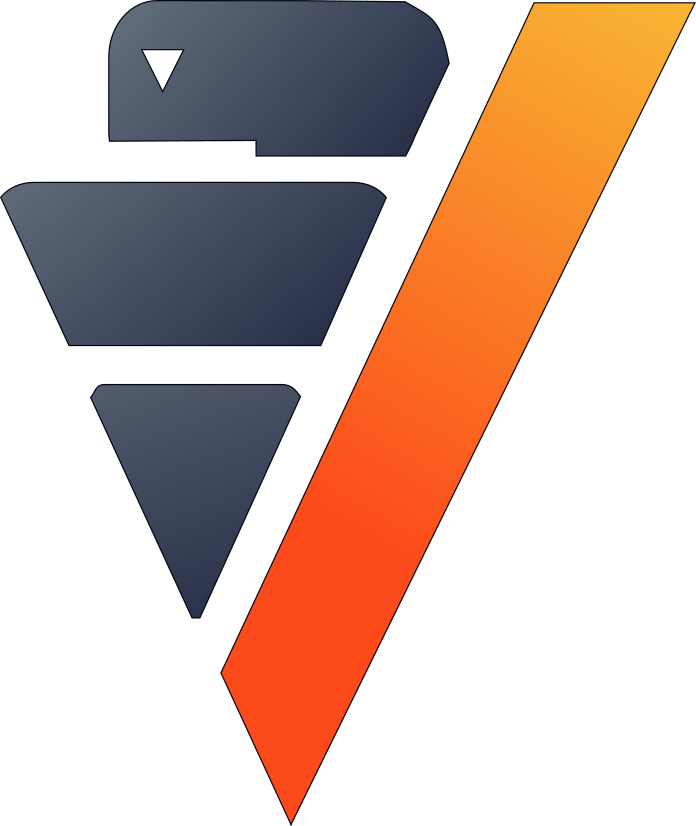

In [15]:
# model report 
var_model.report()

In [16]:
# prediction
prediction = var_model.predict(commodities,
                               nlead=5)

Let's examine our prediction with a boxplot.

<AxesSubplot:>

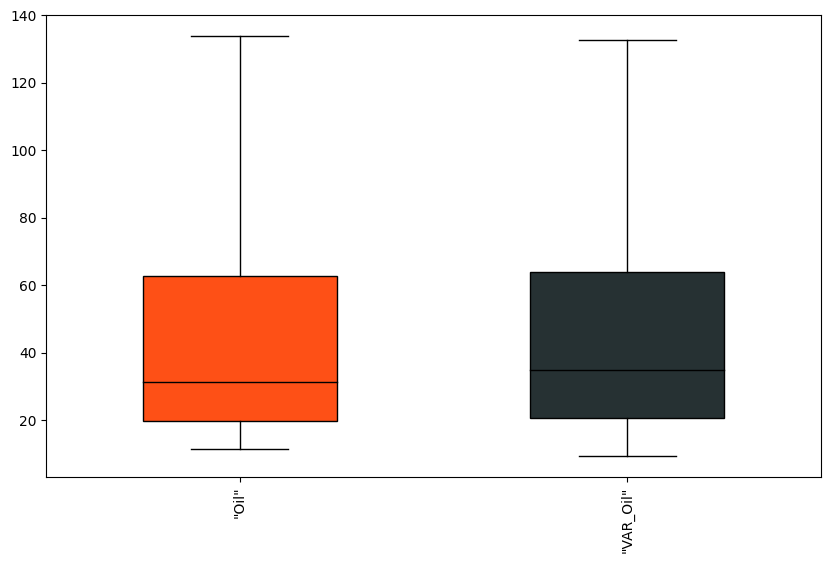

In [17]:
prediction.boxplot(["Oil", "VAR_Oil"])

Let's visualize our model with a graph.

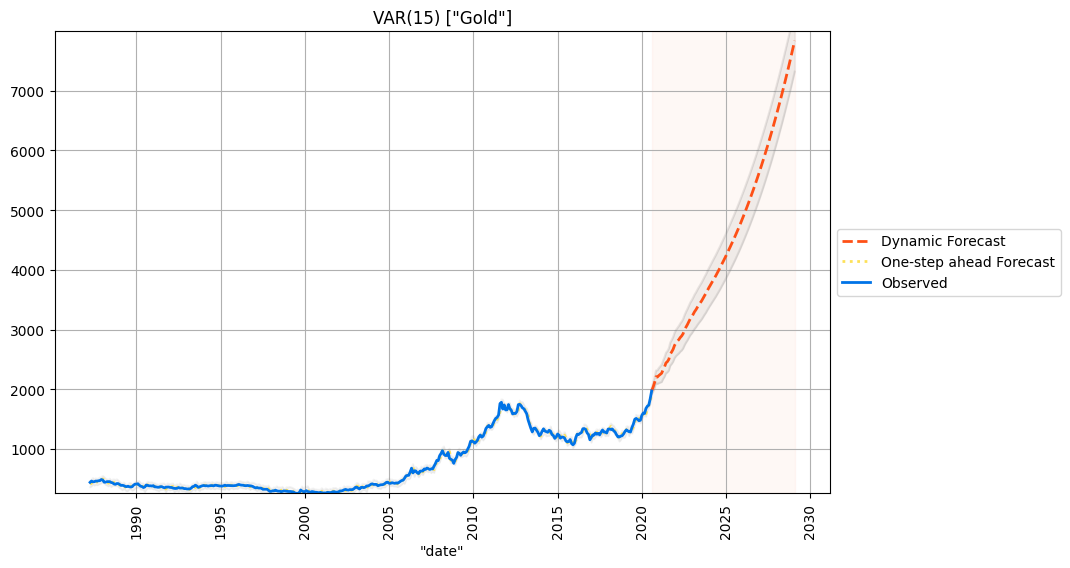

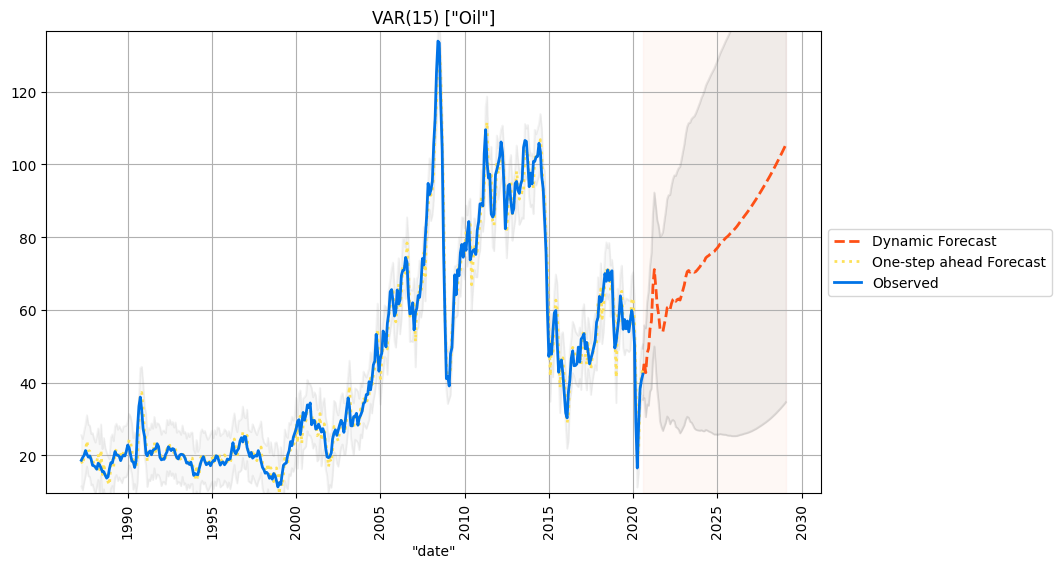

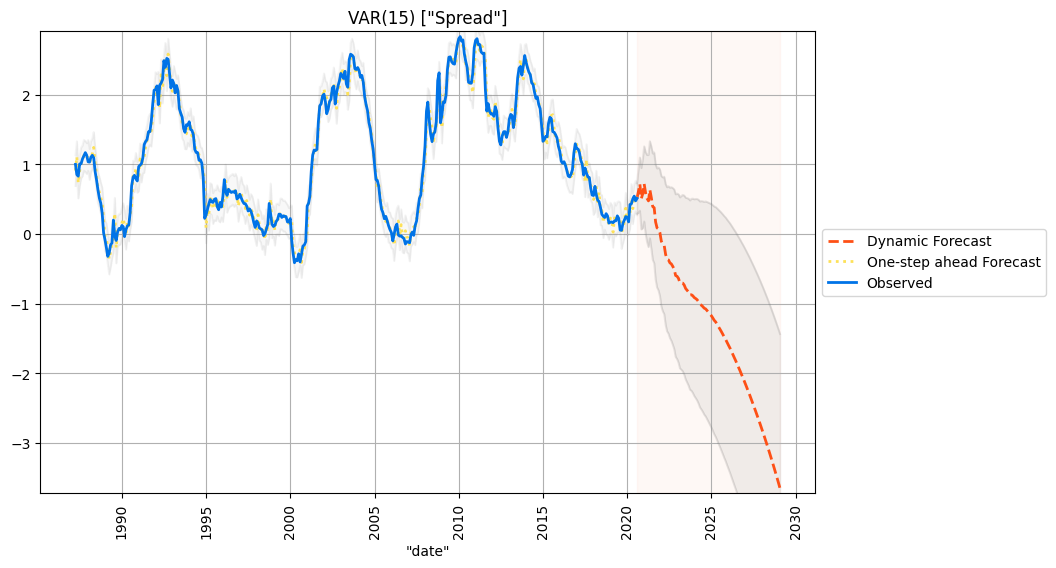

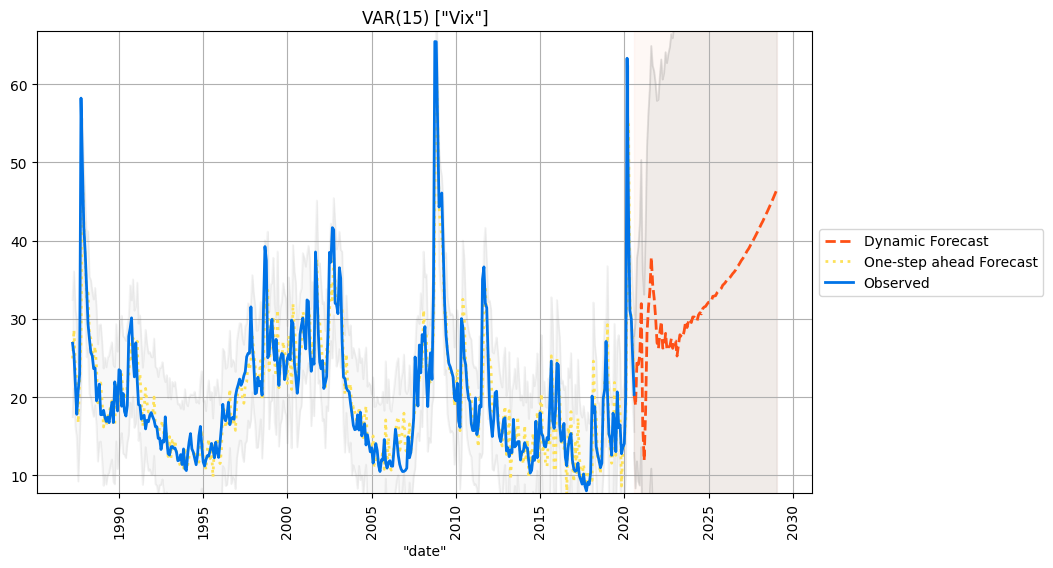

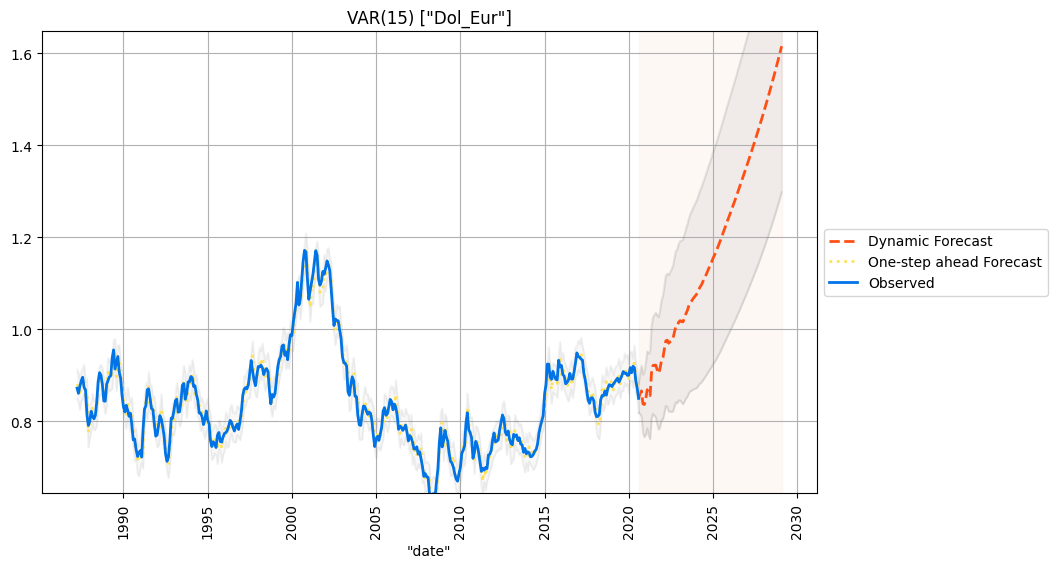

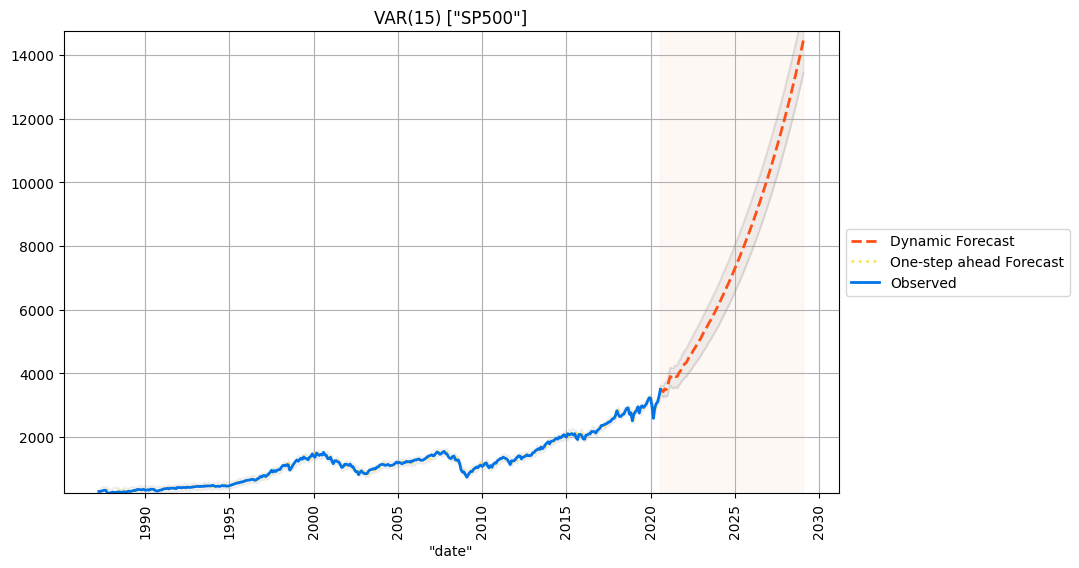

In [18]:
for elem in ['Gold',
             'Oil',
             'Spread',
             'Vix',
             'Dol_Eur',
             'SP500']:
    var_model.plot(X_idx=elem,
                   dynamic=True,
                   nlead=100)

## Model Selection

There are tools to help to choose the best model for the given task in terms of performance and fitting the data.

### AutoML
VerticaPy provides [`AutoML`](https://www.vertica.com/python/documentation_last/delphi/automl/) a powerful tool to have reasonable idea which model has more probability to be the good choice for your task.


<div class="alert alert-block alert-info">
    <b>Important:</b> <b>AutoML</b> conduct basic data preparation on the variables as encoding and it choose the type of machine learning suitable for the case, In addition it perform search grid on the hyper-parameters of the model to the choose the best combination</div>
    
Let's try this tool on titanic dataset.

Starting AutoML



  0%|          | 0/2 [00:00<?, ?it/s]


Testing Model - LogisticRegression



  0%|          | 0/4 [00:00<?, ?it/s]

Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'none', 'solver': 'bfgs'}; Test_score: 0.05034215303734743; Train_score: 0.030678655085670865; Time: 26.521554072697956;
Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'l1', 'solver': 'cgd', 'C': 1.0}; Test_score: 0.301029995663981; Train_score: 0.301029995663981; Time: 0.9640725453694662;
Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'l2', 'solver': 'bfgs', 'C': 1.0}; Test_score: 0.0349504267828074; Train_score: 0.04031527114348203; Time: 24.036807696024578;
Model: LogisticRegression; Parameters: {'tol': 1e-06, 'max_iter': 100, 'penalty': 'enet', 'solver': 'cgd', 'C': 1.0, 'l1_ratio': 0.5}; Test_score: 0.301029995663981; Train_score: 0.301029995663981; Time: 0.8616085052490234;
Grid Search Selected Model
LogisticRegression; Parameters: {'solver': 'bfgs', 'penalty': 'l2', 'max_iter': 100, 'C': 1.0, 'tol': 1e-06}; Test_score: 0.03495042

  0%|          | 0/3 [00:00<?, ?it/s]

Model: NaiveBayes; Parameters: {'alpha': 0.01}; Test_score: 0.15686733325792893; Train_score: 0.0670077116818716; Time: 0.4707820415496826;
Model: NaiveBayes; Parameters: {'alpha': 1.0}; Test_score: 0.2259899109233171; Train_score: 0.11349302785014213; Time: 0.48572731018066406;
Model: NaiveBayes; Parameters: {'alpha': 10.0}; Test_score: 0.18557883959492233; Train_score: 0.10571085101937333; Time: 0.47046621640523273;
Grid Search Selected Model
NaiveBayes; Parameters: {'alpha': 0.01, 'nbtype': 'auto'}; Test_score: 0.15686733325792893; Train_score: 0.0670077116818716; Time: 0.4707820415496826;
Final Model

LogisticRegression; Best_Parameters: {'solver': 'bfgs', 'penalty': 'l2', 'max_iter': 100, 'C': 1.0, 'tol': 1e-06}; Best_Test_score: 0.0349504267828074; Train_score: 0.04031527114348203; Time: 24.036807696024578;


Starting Stepwise


  0%|          | 0/16 [00:00<?, ?it/s]

[Model 0] aic: -4757.4306248569255; Variables: ['"age"', '"boat_8"', '"boat_5"', '"boat_3"', '"boat_14"', '"boat_10"', '"boat_C"', '"boat_4"', '"boat_15"', '"boat_13"', '"fare"', '"pclass"', '"boat_Others"', '"sex_male"', '"sex_female"', '"boat_NULL"']
[Model 1] aic: -4758.794692714417; (-) Variable: "age"
[Model 2] aic: -4760.930190828803; (-) Variable: "boat_8"
[Model 3] aic: -4762.283341702114; (-) Variable: "boat_5"
[Model 4] aic: -4764.118918304077; (-) Variable: "boat_3"
[Model 5] aic: -4765.80453613352; (-) Variable: "boat_14"
[Model 6] aic: -4766.307399945768; (-) Variable: "boat_10"
[Model 7] aic: -4767.084826453643; (-) Variable: "boat_C"
[Model 8] aic: -4769.13338694494; (-) Variable: "boat_4"
[Model 9] aic: -4767.916545392255; (-) Variable: "boat_13"
[Model 10] aic: -4767.537280344475; (-) Variable: "boat_Others"
[Model 11] aic: -4767.081112559485; (-) Variable: "sex_male"
Selected Model

[Model 11] aic: -4767.081112559485; Variables: ['"boat_15"', '"fare"', '"pclass"', '"s

model_type                                parameters              avg_score         avg_train_score               avg_time                score_std          score_train_std   \\
1    LogisticRegression  {'solver': 'bfgs', 'penalty': 'l2', '...     0.0349504267828074     0.04031527114348203     24.036807696024578    0.0059096545356535565    0.0032460905272227868   \\
2    LogisticRegression  {'solver': 'bfgs', 'penalty': 'none',...    0.05034215303734743    0.030678655085670865     26.521554072697956     0.006725314612398976     0.002503319229026392   \\
3            NaiveBayes         {'alpha': 0.01, 'nbtype': 'auto'}    0.15686733325792893      0.0670077116818716     0.4707820415496826       0.1332265651629313     0.006012420907419277   \\
4            NaiveBayes         {'alpha': 10.0, 'nbtype': 'auto'}    0.18557883959492233     0.10571085101937333    0.47046621640523273       0.1278767730160763    0.0042143441936561875   \\
5            NaiveBayes          {'alpha': 1.0, 'nbtype': 'auto'}     0.2259899109233171     0.11349302785014213    0.48572731018066406       0.2430154894934006      0.06870789205762363   \\
6    LogisticRegression  {'solver': 'cgd', 'penalty': 'l1', 'm...      0.301029995663981       0.301029995663981     0.9640725453694662                      0.0                      0.0   \\
7    LogisticRegression  {'solver': 'cgd', 'penalty': 'enet', ...      0.301029995663981       0.301029995663981     0.8616085052490234                      0.0                      0.0   \\
                                model_class  
1  <class 'verticapy.learn.linear_model....  
2  <class 'verticapy.learn.linear_model....  
3  <class 'verticapy.learn.naive_bayes.N...  
4  <class 'verticapy.learn.naive_bayes.N...  
5  <class 'verticapy.learn.naive_bayes.N...  
6  <class 'verticapy.learn.linear_model....  
7  <class 'verticapy.learn.linear_model....  
Rows: 1-7 | Columns: 8
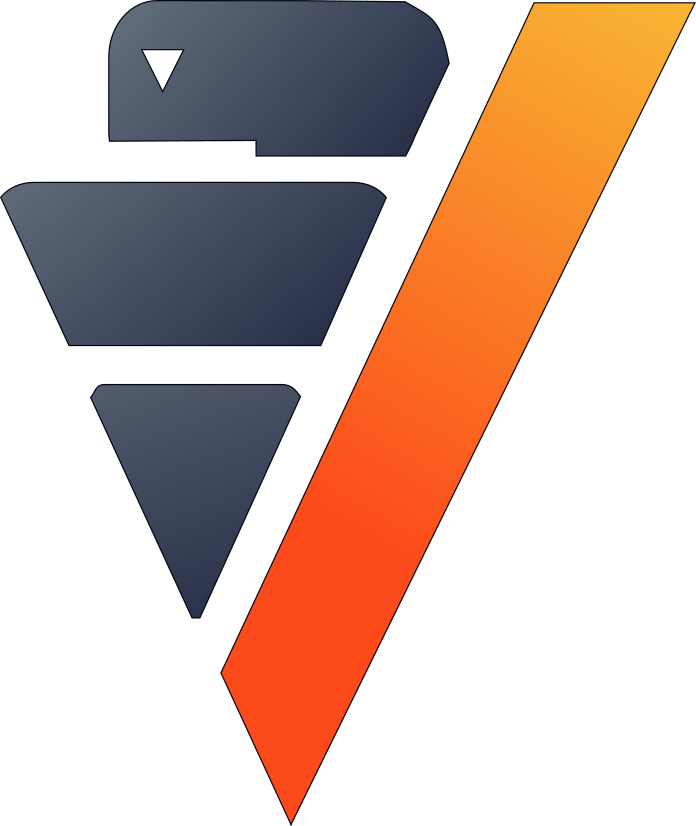

In [19]:
from verticapy.learn.delphi import AutoML

model = AutoML("titanic_autoML")
model.fit("public.titanic",
          X=["boat", "age", "fare", "pclass", "sex"],
          y="survived")

<AxesSubplot:xlabel='n_features', ylabel='aic'>

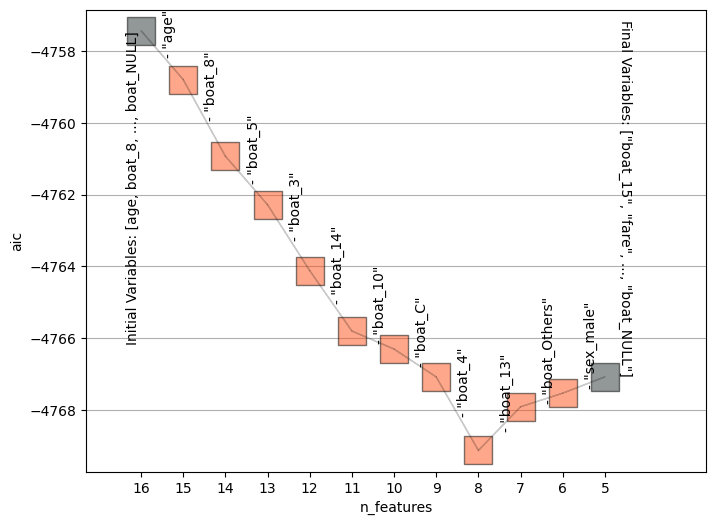

In [20]:
model.plot("stepwise")

<AxesSubplot:xlabel='time', ylabel='score'>

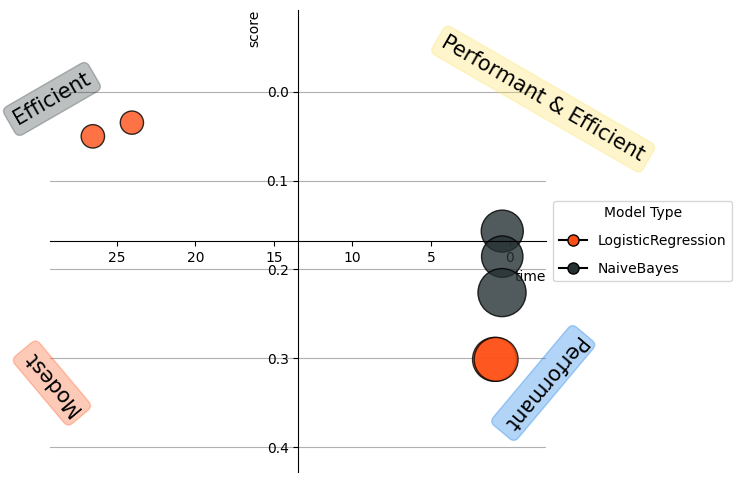

In [21]:
model.plot()

### Grid Search

  0%|          | 0/18 [00:00<?, ?it/s]

Model: LogisticRegression; Parameters: {'tol': 0.01, 'max_iter': 3, 'solver': 'Newton'}; Test_score: 0.8397261606812872; Train_score: 0.8517444070741426; Time: 1.470871130625407;
Model: LogisticRegression; Parameters: {'tol': 0.01, 'max_iter': 3, 'solver': 'BFGS'}; Test_score: 0.6493724734193991; Train_score: 0.6484745754567915; Time: 3.369211037953695;
Model: LogisticRegression; Parameters: {'tol': 0.01, 'max_iter': 10, 'solver': 'Newton'}; Test_score: 0.8478324844972209; Train_score: 0.8488650790644798; Time: 2.0124094486236572;
Model: LogisticRegression; Parameters: {'tol': 0.01, 'max_iter': 10, 'solver': 'BFGS'}; Test_score: 0.6527145291839961; Train_score: 0.6580430762113785; Time: 4.5657947063446045;
Model: LogisticRegression; Parameters: {'tol': 0.01, 'max_iter': 100, 'solver': 'Newton'}; Test_score: 0.8487192400619157; Train_score: 0.8483724301122368; Time: 2.165724436442057;
Model: LogisticRegression; Parameters: {'tol': 0.01, 'max_iter': 100, 'solver': 'BFGS'}; Test_score: 0.

parameters             avg_score       avg_train_score              avg_time                score_std          score_train_std  
1   {'solver': 'Newton', 'penalty': 'l2',...    0.8509585550450387    0.8477787842943648    2.3633410930633545     0.007110545248311444     0.003022224764232993  
2   {'solver': 'Newton', 'penalty': 'l2',...    0.8495460311024986    0.8483744185331227     2.544625997543335    0.0060831619523620765     0.003246355165198968  
3   {'solver': 'Newton', 'penalty': 'l2',...    0.8488348626114883    0.8473316040722135    1.8366048336029053     0.005272208759312469     0.003509980975044496  
4   {'solver': 'Newton', 'penalty': 'l2',...    0.8487192400619157    0.8483724301122368     2.165724436442057      0.01076419314174088     0.006100955370370013  
5   {'solver': 'Newton', 'penalty': 'l2',...    0.8478324844972209    0.8488650790644798    2.0124094486236572    0.0023789328908671325    0.0012865764798660252  
6   {'solver': 'Newton', 'penalty': 'l2',...    0.8465821854377329    0.8501053211660297    2.0507063070933023    0.0006539454804584976    0.0005398488834219457  
7   {'solver': 'BFGS', 'penalty': 'l2', '...    0.8445393106180067    0.8508182796301702    26.455814599990845    0.0066010071604250065    0.0031326337311262838  
8   {'solver': 'Newton', 'penalty': 'l2',...    0.8418428455721999    0.8519338835084981    2.0560573736826577     0.008825438683981281     0.004202358973515276  
9   {'solver': 'Newton', 'penalty': 'l2',...    0.8397261606812872    0.8517444070741426     1.470871130625407      0.00791666089742473    0.0037592960466176265  
10  {'solver': 'BFGS', 'penalty': 'l2', '...    0.8379520374764444    0.8538877083568693    30.834884723027546    0.0033837349020602375    0.0010118432381170698  
11  {'solver': 'Newton', 'penalty': 'l2',...    0.8366478428784746    0.8536128056229351    2.1675036748250327     0.015541863030340206    0.0077655475903906715  
12  {'solver': 'BFGS', 'penalty': 'l2', '...    0.7608943562753796    0.7644191903587031     14.41307544708252      0.09664406879831215      0.10251220693275528  
13  {'solver': 'BFGS', 'penalty': 'l2', '...     0.701567586398158    0.7126726027543004     7.175775607426961     0.006574125480043677     0.016365329632030242  
14  {'solver': 'BFGS', 'penalty': 'l2', '...    0.6726668048049024    0.6648346985030047     7.110422770182292     0.011153161956899508     0.004128427396371283  
15  {'solver': 'BFGS', 'penalty': 'l2', '...    0.6596906429816395    0.6463911320742562    3.1161805788675943     0.008166645852823116     0.007047211077650599  
16  {'solver': 'BFGS', 'penalty': 'l2', '...    0.6527145291839961    0.6580430762113785    4.5657947063446045     0.004090328908211809      0.01580092757551951  
17  {'solver': 'BFGS', 'penalty': 'l2', '...    0.6493724734193991    0.6484745754567915     3.369211037953695     0.015194123626820938    0.0035956346935879777  
18  {'solver': 'BFGS', 'penalty': 'l2', '...    0.6435450792097718    0.6509739822359044       3.1858971118927      0.00198485123330545    0.0002690690486185888  
Rows: 1-18 | Columns: 6
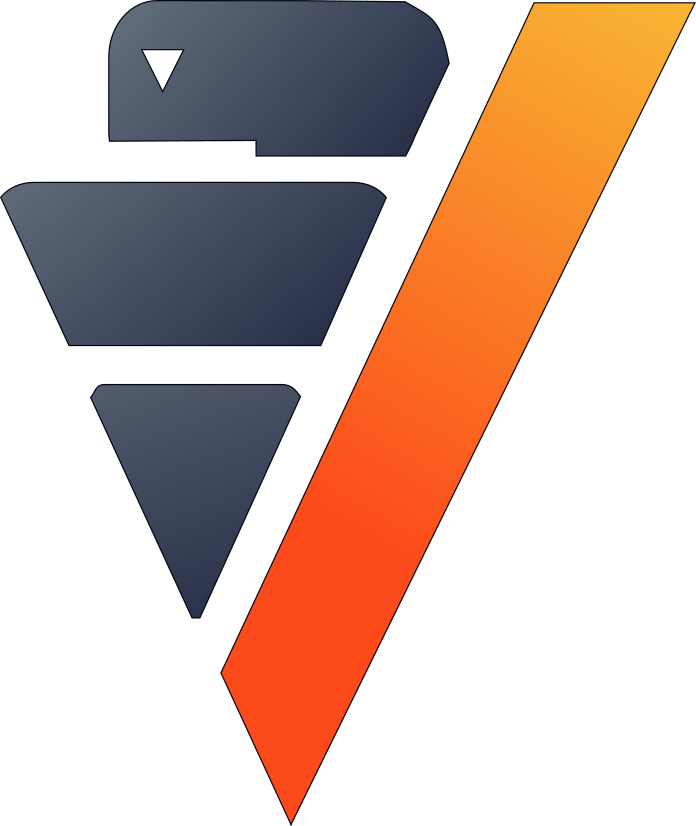

In [24]:
from verticapy.learn.model_selection import grid_search_cv


grid_search_cv(lr_model,
               {"tol": [1e-2, 1e-4, 1e-6],
                "max_iter": [3, 10, 100],
                "solver": ["Newton", "BFGS"]},
               input_relation=churn,
               X=churn.get_columns(exclude_columns=["churn"]),
               y='churn',
               cv=3,
               metric="auc",
               print_info=True)

### Cross-Validation

Let's try [`cross_validate`](https://www.vertica.com/python/documentation_last/learn/cross_validate/index.php). 

More techniques for model selection are provided [here](https://www.vertica.com/python/documentation_last/learn/model-selection.php).

In [25]:
from verticapy.learn.model_selection import cross_validate
res_test, res_train = cross_validate(
    lr_model,
    input_relation=churn,
    X=churn.get_columns(exclude_columns=["churn"]),
    y='churn',
    cv=3,
    metric="auc",
    training_score=True)

  0%|          | 0/3 [00:00<?, ?it/s]

auc                  time  
1-fold          0.854174857553991     57.48806381225586  
2-fold         0.8474348624987083    61.941287994384766  
3-fold          0.847420716690013    48.829127073287964  
avg            0.8496768122475707     56.08615962664286  
std         0.0038954279238529203     6.667547713696091  
Rows: 1-5 | Columns: 3
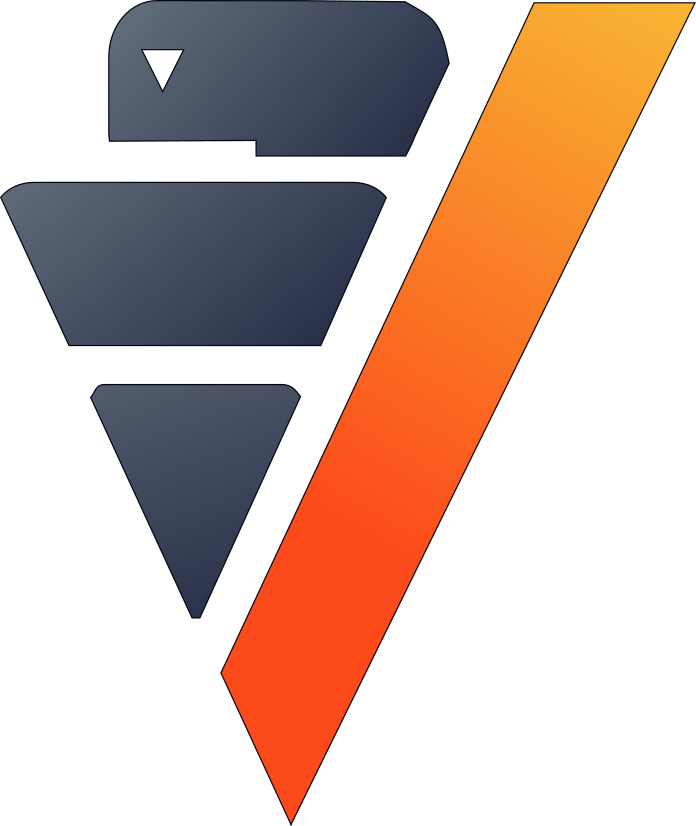

In [26]:
# Training results
res_train

auc                  time  
1-fold        0.8375011064884516     57.48806381225586  
2-fold        0.8517704395310638    61.941287994384766  
3-fold        0.8532603202896021    48.829127073287964  
avg           0.8475106221030392     56.08615962664286  
std         0.008700444718384817     6.667547713696091  
Rows: 1-5 | Columns: 3
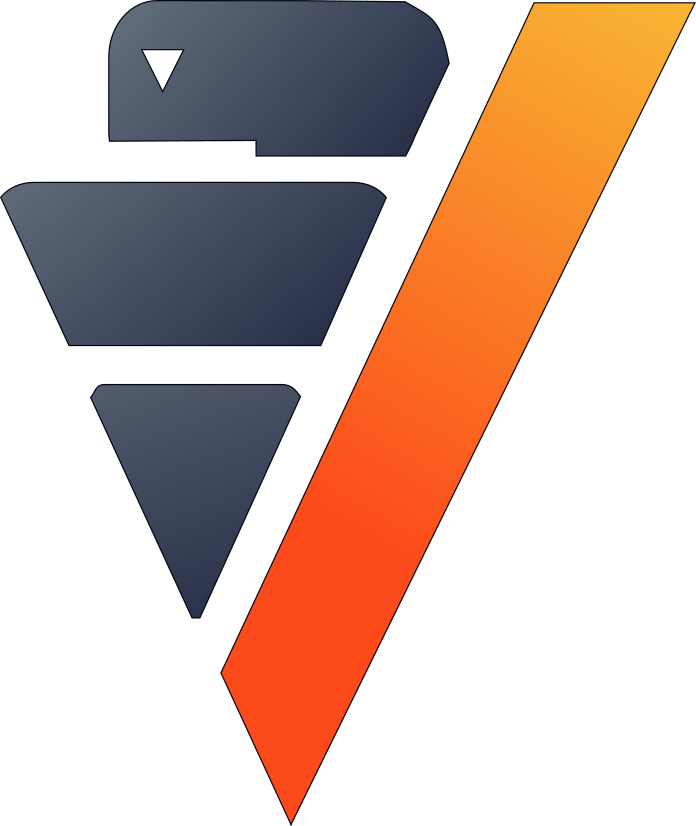

In [27]:
# Test results
res_test